<a href="https://colab.research.google.com/github/pioneer123456/ML_models_from_Scratch/blob/main/Multiple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#importing libraries 
import numpy as np 
import pandas as pd
df = pd.read_csv('Medical Price Dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
#checking the correlation between input variables and output variable i.e. charges
df.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [40]:
#dropping some columns
df = df.drop(['smoker', 'sex', 'region'], axis=1)
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


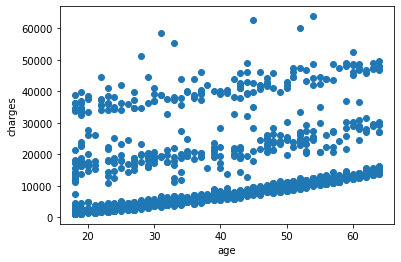

In [41]:
#Plotting
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

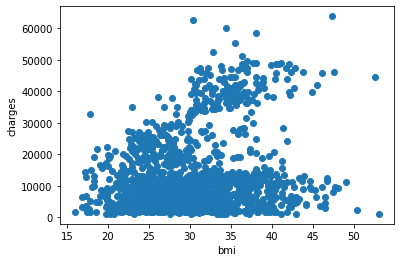

In [42]:
#Plotting
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

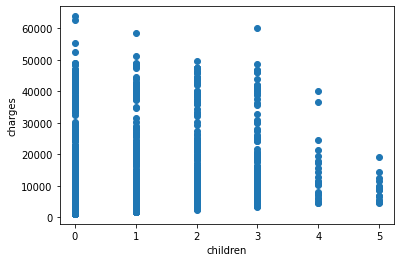

In [43]:
#Plotting
plt.scatter(df['children'], df['charges'])
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

In [44]:
#changing into numpy array
df_np = df.to_numpy()
df_np.shape

(1338, 4)

In [45]:
#input and output variables
X_train, y_train = df_np[:, :3], df_np[:, -1]
X_train.shape, y_train.shape

((1338, 3), (1338,))

In [46]:
X_train

array([[19.  , 27.9 ,  0.  ],
       [18.  , 33.77,  1.  ],
       [28.  , 33.  ,  3.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  0.  ]])

In [47]:
#Checking with sklearn before making our own model
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions

array([ 6908.77753344,  9160.97706103, 12390.94691779, ...,
        9640.92917145,  6691.39141657, 17377.08299024])

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

(9015.442199156729, 128943244.63563198)

In [49]:
#Displaying as dataframe
predictions_df = pd.DataFrame({'age': df['age'],
                               'bmi': df['bmi'],
                               'children': df['children'],
                               'charges': df['charges'],
                               'Sklearn charges Predictions':sklearn_y_predictions})
predictions_df

,age,bmi,children,charges,Sklearn charges Predictions
0,19,27.900,0,16884.92400,6908.777533
1,18,33.770,1,1725.55230,9160.977061
2,28,33.000,3,4449.46200,12390.946918
3,33,22.705,0,21984.47061,8543.527095
4,32,28.880,0,3866.85520,10354.147396
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,16996.696122
1334,18,31.920,0,2205.98080,8003.758184
1335,18,36.850,0,1629.83350,9640.929171
1336,21,25.800,0,2007.94500,6691.391417


In [50]:
# using general expression: charges[i] = alpha + (beta_1 * age[i]) + (beta_2 * bmi[i]) + (beta_3 * children[i]) + some_error

# Model:     y_approx[i] = alpha_approx + (beta_1_approx * x_1[i]) + (beta_2_approx * x_2[i]) + (beta_3_approx* x_3[i])

def get_predictions(model, X):
  '''
  Obtain the predictions for the given model and inputs.

  model: np.array of Floats with shape (p,) of parameters
  X: np.array of Floats with shape (n, p-1) of inputs
  
  Returns: np.array of Floats with shape (n,).
  '''

  (n, p_minus_one) = X.shape  # shape of input matrix is (x,p-1)
  p = p_minus_one + 1 # increment the value of p to generate p rows)


  new_X = np.ones(shape=(n, p))  #generate a new matrix x of ones
  new_X[:, 1:] = X  # add ones matrix column to first column of x

  return np.dot(new_X, model) # matrix multiplication of beta values and new (n,p) generated matrix

In [51]:
test_model = np.array([1, 1/4, 1/3, 1.2]) # giving random values to beta
get_predictions(test_model, X_train) # generate predictions

array([15.05      , 17.95666667, 22.6       , ..., 17.78333333,
       14.85      , 25.94      ])

In [36]:
get_predictions(test_model, X_train).shape

(1338,)

In [52]:
predictions_df['Test Predictions'] = get_predictions(test_model, X_train)
predictions_df

,age,bmi,children,charges,Sklearn charges Predictions,Test Predictions
0,19,27.900,0,16884.92400,6908.777533,15.050000
1,18,33.770,1,1725.55230,9160.977061,17.956667
2,28,33.000,3,4449.46200,12390.946918,22.600000
3,33,22.705,0,21984.47061,8543.527095,16.818333
4,32,28.880,0,3866.85520,10354.147396,18.626667
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,16996.696122,27.423333
1334,18,31.920,0,2205.98080,8003.758184,16.140000
1335,18,36.850,0,1629.83350,9640.929171,17.783333
1336,21,25.800,0,2007.94500,6691.391417,14.850000


In [30]:
mean_absolute_error(predictions_df['Test Predictions'], y_train)

13248.085475156204

the values are too off!


# Making a best prediction Model

In [53]:
#Importing lib for inverse
from numpy.linalg import inv

def get_best_model(X, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  X: np.array of Floats with shape (n, p-1) of inputs
  y: np.array of Floats with shape (n,) of observed outputs

  Returns: np.array of shape (p,) representing the model.
  '''

  (n, p_minus_one) = X.shape # (shape of input matrix is x,p-1)
  p = p_minus_one + 1 # ( increment the value of p to generate p rows)

  new_X = np.ones(shape=(n, p)) # generate a new matrix x of ones
  new_X[:, 1:] = X  # add ones matrix column to first column of x

  return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y) # Formula

In [54]:
best_model = get_best_model(X_train, y_train)
predictions_df['My model Predictions'] = get_predictions(best_model, X_train)
predictions_df

,age,bmi,children,charges,Sklearn charges Predictions,Test Predictions,My model Predictions
0,19,27.900,0,16884.92400,6908.777533,15.050000,6908.777533
1,18,33.770,1,1725.55230,9160.977061,17.956667,9160.977061
2,28,33.000,3,4449.46200,12390.946918,22.600000,12390.946918
3,33,22.705,0,21984.47061,8543.527095,16.818333,8543.527095
4,32,28.880,0,3866.85520,10354.147396,18.626667,10354.147396
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,16996.696122,27.423333,16996.696122
1334,18,31.920,0,2205.98080,8003.758184,16.140000,8003.758184
1335,18,36.850,0,1629.83350,9640.929171,17.783333,9640.929171
1336,21,25.800,0,2007.94500,6691.391417,14.850000,6691.391417


Model gives prodictions similar to sklearn model

In [56]:
mean_absolute_error(predictions_df['My model Predictions'], y_train), mean_squared_error(predictions_df['My model Predictions'], y_train)

(9015.442199156736, 128943244.63563198)